In [116]:
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt

In [69]:
df_关卡名_危机合约 = pd.read_html(requests.get('https://prts.wiki/w/关卡一览').text)[12]
lst_关卡名_危机合约 = [_.replace(" ", "_") for _ in [df_关卡名_危机合约.iloc[_, __] for _ in range(8) for __ in range(4)][:-2]]
lst_关卡名_危机合约

['龙门外环_荒芜广场',
 '龙门外环_无人危楼',
 '切尔诺伯格_59区废墟',
 '未知沙漠_荒漠',
 '龙门_新街',
 '龙门_中转站',
 '龙门外环_霜冻废墟',
 '切尔诺伯格_破碎大道',
 '荒野_黄铁峡谷',
 '龙门_军械库东',
 '切尔诺伯格_荒废工厂',
 '切尔诺伯格_6区废墟',
 '荒野_风蚀高地',
 '哥伦比亚_闭锁监狱',
 '荒野_无序矿区',
 '卡西米尔_八号竞技场',
 '切尔诺伯格_遗弃地块',
 '荒野_狂嚎沙原',
 '荒野_炽热溶洞',
 '炎国_灰齐山麓',
 '萨尔贡_沙海遗迹',
 '卡西米尔_大骑士领酒吧街',
 '炎国_尚蜀山道',
 '伊比利亚_盐风溶洞',
 '维多利亚_小丘郡物流站',
 '维多利亚_伦蒂尼姆边缘区块',
 '乌萨斯_冻原矿场',
 '玻利瓦尔_在建沙滩',
 '维多利亚_迷雾战区',
 '荒野_无名庇护所']

In [42]:
for _ in lst_关卡名_危机合约:
    pd.read_html(requests.get('https://prts.wiki/w/' + _).text, header=1)[1].iloc[:, 1:].to_csv('危机合约/' + _ + '.csv', index=False)
    print(_)
    time.sleep(5)

维多利亚_伦蒂尼姆边缘区块
乌萨斯_冻原矿场
玻利瓦尔_在建沙滩
维多利亚_迷雾战区
荒野_无名庇护所


In [ ]:
# pd.read_html(requests.get('https://prts.wiki/w/维多利亚_小丘郡物流站').text, header=1)[1].iloc[:, 1:].to_csv('危机合约/维多利亚_小丘郡物流站.csv', index=False)

In [106]:
df = pd.DataFrame()
for _ in lst_关卡名_危机合约:
    df = pd.concat([df, pd.read_csv('危机合约/' + _ + '.csv')], axis=0)

for _ in range(len(df)):
    if type(df['数量'].iloc[_]) == str:
        if df['数量'].iloc[_] == '3~5':
            df['数量'].iloc[_] = 3
        else:
            df['数量'].iloc[_] = int(df['数量'].iloc[_])

df.to_csv('危机合约/危机合约汇总.csv', index=False)
df

C:\Users\hang\AppData\Local\Temp\ipykernel_27708\537391873.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['数量'].iloc[_] = int(df['数量'].iloc[_])
C:\Users\hang\AppData\Local\Temp\ipykernel_27708\537391873.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['数量'].iloc[_] = 3


,名称,数量,地位,级别,生命值,攻击力,防御力,法术抗性,攻击间隔,重量等级,移动速度,攻击范围半径,目标价值
0,猎狗pro,12,普通,0,1700,260,0,20.0,1.4,0,1.90,—,1
1,狂暴的猎狗pro,47,普通,0,3000,370,0,20.0,1.4,0,1.90,—,1
2,轻甲卫兵,11,普通,0,2500,250,400,0.0,2.0,1,1.00,—,1
3,重装防御者,2,精英,0,6000,600,800,0.0,2.6,3,0.75,—,1
4,高阶术师组长,3,精英,0,13500,380,160,50.0,3.8,1,0.70,2.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,游击队迫击炮兵,3,精英,0,5500,350,550,20.0,4.8,2,0.60,15.0,1
4,游击队萨卡兹战士,4,精英,0,8000,480,280,50.0,2.5,2,0.85,—,1
5,寻仇者,1,精英,0,7000,470,200,50.0,3.0,2,0.65,—,1
6,复仇者,3,精英,0,18000,650,230,50.0,3.0,2,0.65,—,1


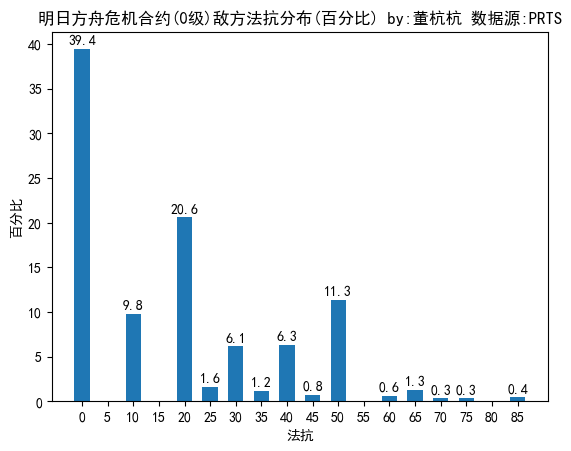

In [195]:
total_怪物数量 = df['数量'].sum() # 1599
x, y = [], []
for _ in df.groupby('法术抗性'):
    x.append(_[0])
    y.append(_[1]['数量'].sum() / total_怪物数量 * 100)
plt.bar(x, y, width=3)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('明日方舟危机合约(0级)敌方法抗分布(百分比) by:董杭杭 数据源:PRTS') 
plt.xlabel('法抗')
plt.ylabel('百分比')
plt.xticks(range(0,90,5))

for a, b in zip(x, y):
    plt.text(a, b+0.3,'%.1f'%b, ha = 'center',va = 'bottom')

plt.savefig('法抗.png')
plt.show()

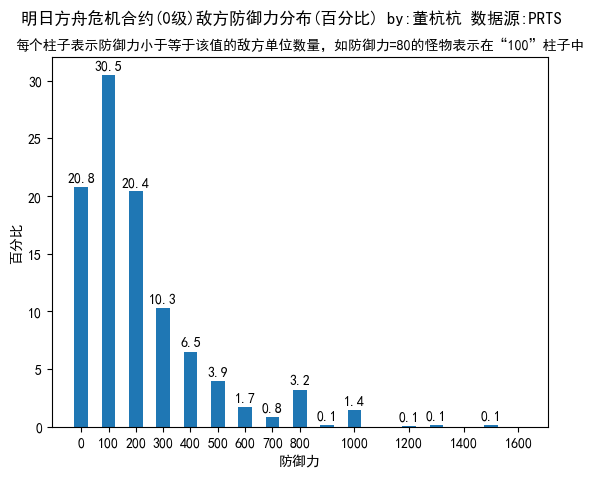

In [198]:
x, y = [], []
last_防御力 = -1
lst_防御力分组 = list(range(0, 1700, 100))

for _ in lst_防御力分组:
    x.append(_)
    y.append(df[(last_防御力 < df['防御力']) & (df['防御力'] <= _)]['数量'].sum() / total_怪物数量 * 100)
    last_防御力 = _

plt.bar(x, y, width=50)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.suptitle('明日方舟危机合约(0级)敌方防御力分布(百分比) by:董杭杭 数据源:PRTS') 
plt.title('每个柱子表示防御力小于等于该值的敌方单位数量，如防御力=80的怪物表示在“100”柱子中', fontsize=10)
plt.xlabel('防御力')
plt.ylabel('百分比')
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 1200, 1400, 1600])

for a, b in zip(x, y):
    plt.text(a, b+0.3,'%.1f'%b if b != 0 else '', ha = 'center',va = 'bottom')

plt.savefig('防御力.png')
plt.show()